# Dispenser Testing

## Setup

### Relevant Imports

In [1]:
import asyncio
from Scale import Scale
from ClearCore import ClearCore
from dispenser import Dispenser

### Instantiate Objects

In [2]:
s = Scale(716692)
m = ClearCore('192.168.1.11', 0, 6400)
d = Dispenser(m, s)
await d.tare()

## Motor Commands

### Jog

In [3]:
await m.enable()
await m.jog(500)

'\x02M0500'

### Disable

In [14]:
await m.stop()
await m.disable()

'\x02M0_'

## Scale Commands

### Weigh

In [11]:
await d.weigh()

1.1154611481561005

### Calibrate

In [ ]:
await d.calibrate(test_mass=393.8) # using tape measure

### Tare

In [12]:
await d.tare()

## Plot Data

### Plot Weight Data

STD:  5.011599252201649
Range: +/- 21.401387837614333


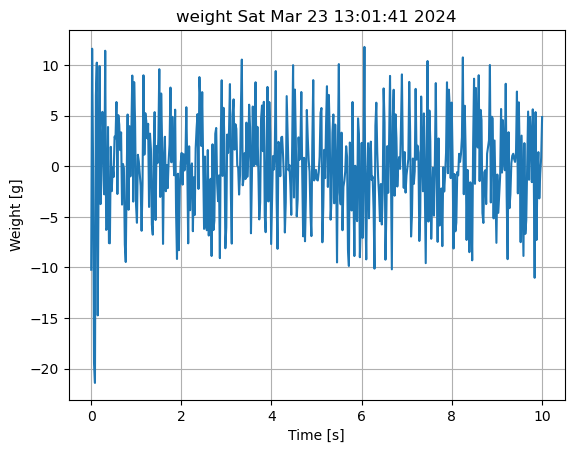

In [13]:
await d.test_true(duration=10)

### Plot Median Data

STD:  0.38510962685700384
Range: +/- 0.7974613784477016


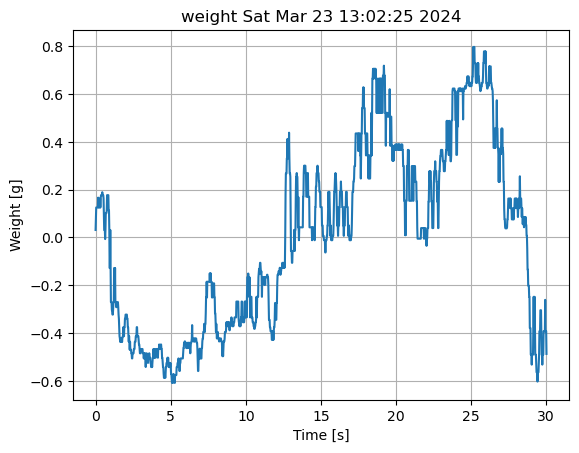

In [15]:
await d.test_med(duration=30)

### Plot Spectral Data

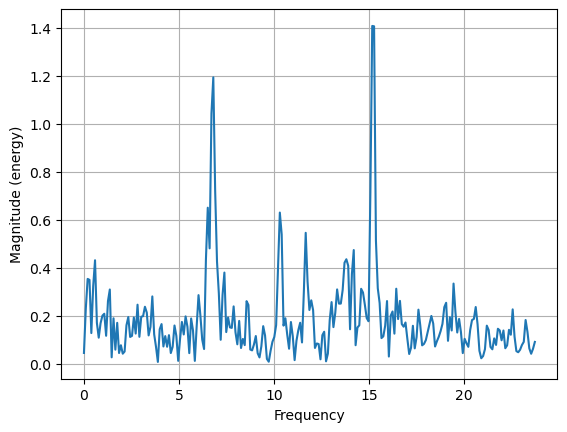

In [14]:
d.plot_spec()

## Dispensing

### Dispense

Dispensed  100.4
STD:  31.224386355601272
Range: +/- 64.04351815447733


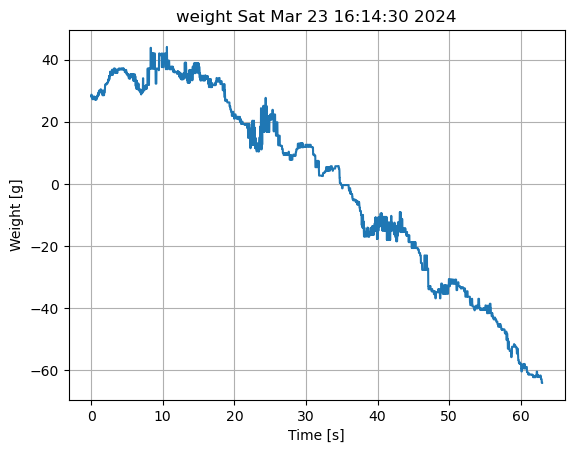

In [15]:
await d.dispense(serving=100, samples=100, sample_rate=50, rpm=300, offset=8, let_pass=3)

### Clear Dispenser

In [17]:
await m.enable()
await m.jog(2000)
await asyncio.sleep(30)
await m.stop()
await m.disable()

'\x02M0_'